In [1]:
from proglearn.network import LifelongClassificationNetwork
from proglearn.sims import generate_gaussian_parity
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x,y = generate_gaussian_parity(10)
x_test, y_test = generate_gaussian_parity(500)

network = keras.Sequential() #5,5,2 NN
network.add(keras.layers.Dense(5, activation="relu", input_shape=(2,)))
network.add(keras.layers.Dense(5, activation="relu"))
network.add(keras.layers.Dense(units=2, activation="softmax"))


SynN = LifelongClassificationNetwork(network=network)
SynN.add_task(x,y, task_id=0)

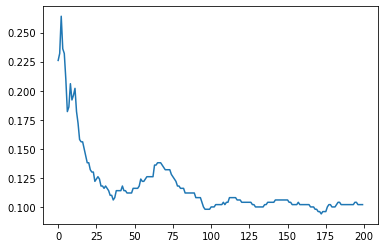

In [5]:
errors =[]
for i in range(200):
    x_,y_ = generate_gaussian_parity(10)
    SynN.update_task(x_,y_, task_id=0)
    y_hat = SynN.predict(x_test, task_id=0)
    errors.append(1-np.mean(y_hat==y_test))
plt.plot(errors)
